<a href="https://colab.research.google.com/github/Theoph-ay/pytorch_tutorials/blob/main/02_Classification_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!pip install torchmetrics

In [43]:
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import pandas as pd

In [44]:
#setting device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [45]:
#get data
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

In [46]:
#view data structure
X[:5], y[:5]

(array([[-0.05146968,  0.44419863],
        [ 1.03201691, -0.41974116],
        [ 0.86789186, -0.25482711],
        [ 0.288851  , -0.44866862],
        [-0.83343911,  0.53505665]]),
 array([1, 1, 1, 1, 0]))

In [47]:
#let's convert out data to df
moons = pd.DataFrame({"X1": X[:, 0],
                      "X2": X[:, 1],
                      "labels": y})
moons.head()

,X1,X2,labels
0,-0.051470,0.444199,1
1,1.032017,-0.419741,1
2,0.867892,-0.254827,1
3,0.288851,-0.448669,1
4,-0.833439,0.535057,0


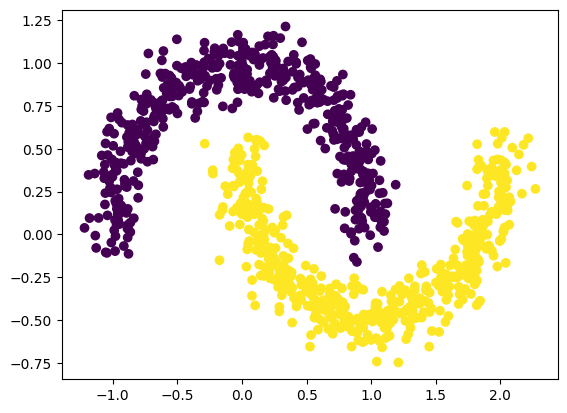

In [48]:
#Visualisee our image
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
         y=X[:,1],
            c=y
            )
plt.show()

In [49]:
#check input shapes
X.shape, y.shape

((1000, 2), (1000,))

In [50]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Sample input features: {X_sample} and same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and y: {y_sample.shape}")

Sample input features: [-0.05146968  0.44419863] and same for y: 1
Shapes for one sample of X: (2,) and y: ()


In [51]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)


In [52]:
type(X), type(y), X.shape, y.shape, X.dtype, y.dtype

(torch.Tensor,
 torch.Tensor,
 torch.Size([1000, 2]),
 torch.Size([1000]),
 torch.float32,
 torch.float32)

In [53]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.2,
                                                    random_state =42)

In [54]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

In [55]:
#constructing model class
class MoonsModelV0(nn.Module):
  def __init__(self, input_features, output_features, hidden_units):
    super().__init__()
    self.Linear_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  #forward pass
  def forward(self, x):
     return self.Linear_stack(x)

In [56]:
model_0 = MoonsModelV0(input_features=2, output_features=1, hidden_units=16).to(device)
model_0

MoonsModelV0(
  (Linear_stack): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [57]:
# Set up loss function and optimizer

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [58]:
#Set up accuracy function
from torchmetrics.classification import BinaryAccuracy
accuracy_fn = BinaryAccuracy().to(device)

In [59]:
#Training and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#send data to device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 500

for epoch in range(epochs):

  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #test loss and accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.69480 | Acc: 0.50 | Test Loss: 0.68901 | Test Acc: 0.50
Epoch: 10 | Loss: 0.63867 | Acc: 0.80 | Test Loss: 0.63847 | Test Acc: 0.78
Epoch: 20 | Loss: 0.58447 | Acc: 0.80 | Test Loss: 0.58776 | Test Acc: 0.76
Epoch: 30 | Loss: 0.52132 | Acc: 0.80 | Test Loss: 0.52825 | Test Acc: 0.76
Epoch: 40 | Loss: 0.45849 | Acc: 0.81 | Test Loss: 0.46939 | Test Acc: 0.78
Epoch: 50 | Loss: 0.40818 | Acc: 0.82 | Test Loss: 0.42154 | Test Acc: 0.79
Epoch: 60 | Loss: 0.37228 | Acc: 0.83 | Test Loss: 0.38580 | Test Acc: 0.81
Epoch: 70 | Loss: 0.34625 | Acc: 0.83 | Test Loss: 0.35855 | Test Acc: 0.81
Epoch: 80 | Loss: 0.32673 | Acc: 0.85 | Test Loss: 0.33736 | Test Acc: 0.82
Epoch: 90 | Loss: 0.31146 | Acc: 0.86 | Test Loss: 0.32022 | Test Acc: 0.85
Epoch: 100 | Loss: 0.29903 | Acc: 0.86 | Test Loss: 0.30578 | Test Acc: 0.86
Epoch: 110 | Loss: 0.28867 | Acc: 0.86 | Test Loss: 0.29348 | Test Acc: 0.86
Epoch: 120 | Loss: 0.28001 | Acc: 0.87 | Test Loss: 0.28307 | Test Acc: 0.86
Epoch: 130

In [60]:
#predictions
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

In [61]:
#Check model's accuracy
accuracy_fn(y_pred, y_test)

tensor(0.9000, device='cuda:0')

In [62]:
# import decision boundaries

import requests
from pathlib import Path

#download helper function
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

  with open ("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


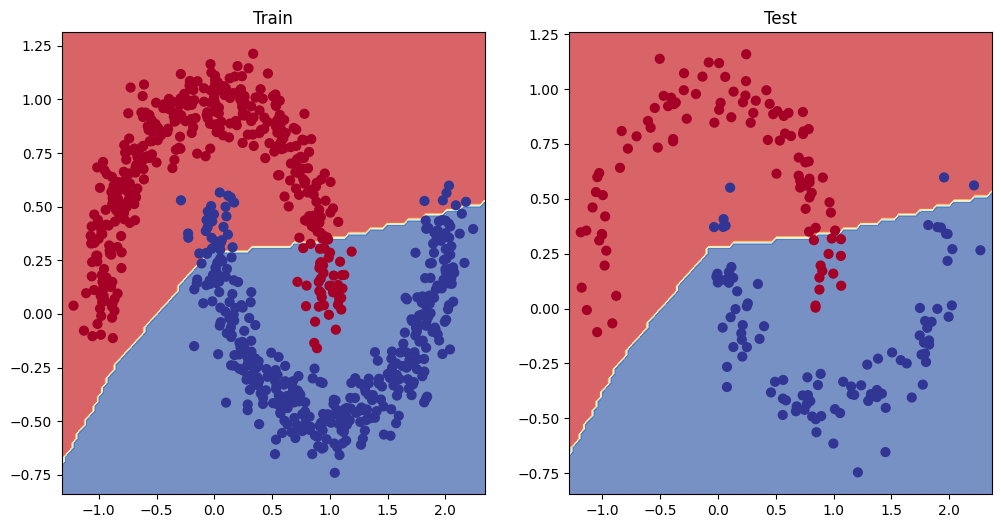

In [63]:
# Plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)
plt.show()

## Tanh Activation Function

In [64]:
# Create a tensor
z= torch.arange(-10, 10, 1, dtype=torch.float32)
z

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [65]:
def tanh(z):
  return (torch.exp(z) - torch.exp(-z)) / (torch.exp(z) + torch.exp(-z))

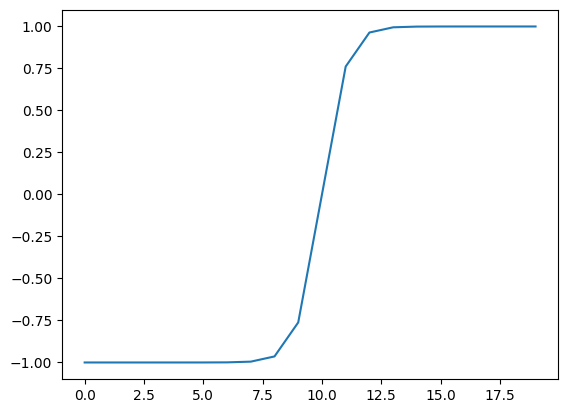

In [66]:
plt.plot(torch.tanh(z))
plt.show()

## Multiclass Classification Model

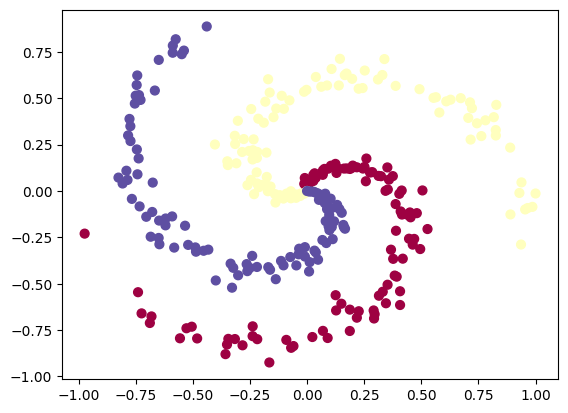

In [67]:
# Get data
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [68]:
X[:5], y[:5]

(array([[-0.        ,  0.        ],
        [-0.00053218,  0.01008698],
        [-0.00265875,  0.0200263 ],
        [ 0.00553255,  0.0297937 ],
        [-0.01217432,  0.03852626]]),
 array([0, 0, 0, 0, 0], dtype=uint8))

In [69]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

In [70]:
X.shape, y.shape

(torch.Size([300, 2]), torch.Size([300]))

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.2,
                                                    random_state =42)

In [72]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([240, 2]),
 torch.Size([240]),
 torch.Size([60, 2]),
 torch.Size([60]))

In [73]:
# Model Class
class MulticlassModel(nn.Module):
  def __init__(self, I_F, O_F, H_U=16):
    super().__init__()
    self.Linear_stack = nn.Sequential(
        nn.Linear(in_features = I_F, out_features=H_U),
        nn.ReLU(),
        nn.Linear(in_features=H_U, out_features=H_U),
        nn.ReLU(),
        nn.Linear(in_features=H_U, out_features=O_F)
    )

  #forward function
  def forward(self, x):
    return self.Linear_stack(x)

In [74]:
model_1 = MulticlassModel(I_F = 2, O_F = 3, H_U = 16).to(device)
model_1

MulticlassModel(
  (Linear_stack): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=3, bias=True)
  )
)

In [75]:
#loss function and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.3)

In [76]:
from torchmetrics.classification import MulticlassAccuracy
accuracy_fn1 = MulticlassAccuracy(num_classes=K, average="macro").to(device)


In [77]:
# Training and Testing loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 500

for epoch in range(epochs):
  #Training
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn1(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()


  #testing
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn1(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}")

Epoch: 0 | Loss: 1.13766 | Acc: 0.33 | Test Loss: 1.12752 | Test Acc: 0.33
Epoch: 10 | Loss: 1.07373 | Acc: 0.55 | Test Loss: 1.07931 | Test Acc: 0.55
Epoch: 20 | Loss: 1.01987 | Acc: 0.62 | Test Loss: 1.03202 | Test Acc: 0.59
Epoch: 30 | Loss: 0.93526 | Acc: 0.63 | Test Loss: 0.95303 | Test Acc: 0.57
Epoch: 40 | Loss: 0.83389 | Acc: 0.61 | Test Loss: 0.85772 | Test Acc: 0.54
Epoch: 50 | Loss: 0.75451 | Acc: 0.59 | Test Loss: 0.78752 | Test Acc: 0.50
Epoch: 60 | Loss: 0.70953 | Acc: 0.57 | Test Loss: 0.75005 | Test Acc: 0.46
Epoch: 70 | Loss: 0.68320 | Acc: 0.58 | Test Loss: 0.72783 | Test Acc: 0.46
Epoch: 80 | Loss: 0.66330 | Acc: 0.58 | Test Loss: 0.71005 | Test Acc: 0.49
Epoch: 90 | Loss: 0.64524 | Acc: 0.59 | Test Loss: 0.69327 | Test Acc: 0.51
Epoch: 100 | Loss: 0.62728 | Acc: 0.61 | Test Loss: 0.67533 | Test Acc: 0.53
Epoch: 110 | Loss: 0.60919 | Acc: 0.62 | Test Loss: 0.65616 | Test Acc: 0.56
Epoch: 120 | Loss: 0.58986 | Acc: 0.63 | Test Loss: 0.63538 | Test Acc: 0.59
Epoch: 130

In [78]:
model_1.eval()
with torch.inference_mode():
  y_logits = model_1(X_test).squeeze()
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

In [79]:
y_pred[:5], y_test[:5]

(tensor([2, 2, 1, 0, 2], device='cuda:0'),
 tensor([2, 2, 1, 0, 2], device='cuda:0'))

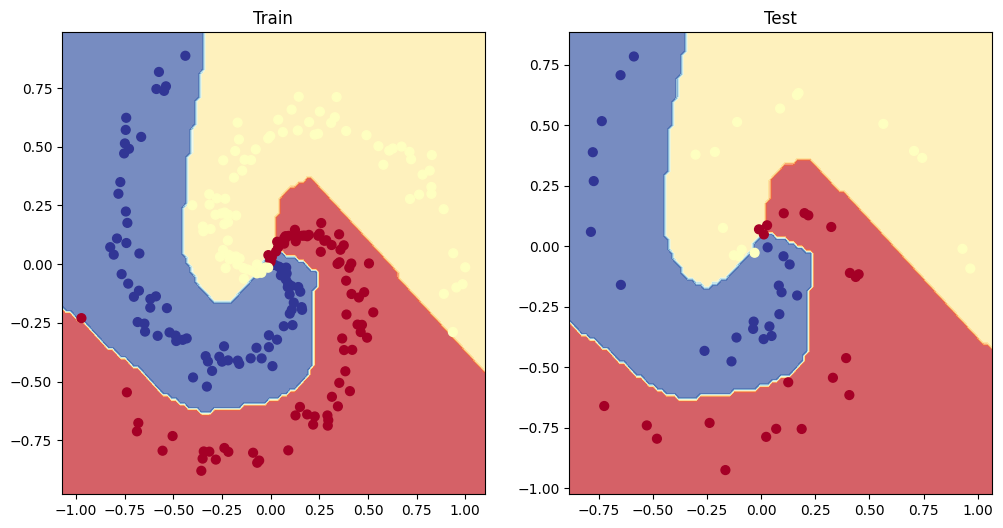

In [81]:
#plot predictions
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)
plt.show()